# Counting blobs with pyclesperanto

A common use case for image processing in the biology context is counting blobs of high signal intensity surrounded by a low intensity background. Thresholding is the method of choice in this scenario. We demonstrate it with Otsu's thresholding method (Otsu et al., IEEE Transactions on Systems, Man, and Cybernetics, Vol. 9 (1), 1979)

In [1]:
import pyclesperanto as cle

In [2]:
from skimage.io import imread, imsave, imshow
import matplotlib
import numpy as np

# we select a GPU
cle.select_device("TX")

(OpenCL) NVIDIA GeForce RTX 2080 SUPER (OpenCL 3.0 CUDA)
	Type: GPU
	Compute Units: 48
	Global Memory Size: 8358 MB
	Maximum Object Size: 2089 MB

In [3]:
# load data
image = imread('https://samples.fiji.sc/blobs.png').squeeze()
print("Image size: ", image.shape)

Image size:  (254, 256)


## Image processing using pyclesperanto

After we initialised a GPU and loaded some data to process as a numpy array, we can start using the librairy and build a workflow like this:

array([[ 41.42875 ,  34.69644 ,  27.733936, ..., 220.92714 , 211.21162 ,
        206.71573 ],
       [ 47.421425,  38.878723,  30.323011, ..., 228.32323 , 220.60194 ,
        216.83534 ],
       [ 48.121433,  40.610855,  33.357384, ..., 235.32935 , 229.7049  ,
        226.8882  ],
       ...,
       [ 74.4386  ,  76.32904 ,  77.03725 , ...,  48.00032 ,  48.00075 ,
         48.001007],
       [ 81.793655,  81.17787 ,  79.80763 , ...,  48.      ,  48.      ,
         48.      ],
       [ 88.816925,  85.382095,  81.478806, ...,  48.      ,  48.      ,
         48.      ]], dtype=float32, mtype=buffer)
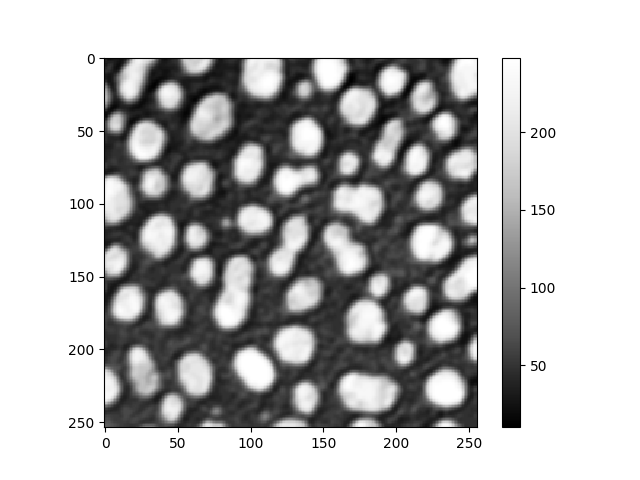
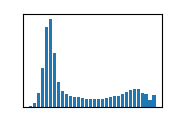

In [4]:
blurred = cle.gaussian_blur(image, sigma_x=1, sigma_y=1)
blurred

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8, mtype=buffer)
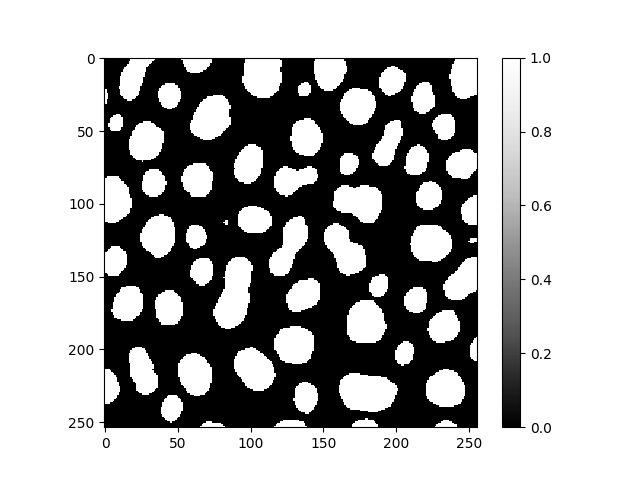
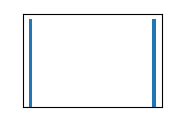

In [5]:
binary = cle.threshold_otsu(blurred)
binary

array([[0, 0, 0, ..., 5, 5, 5],
       [0, 0, 0, ..., 5, 5, 5],
       [0, 0, 0, ..., 5, 5, 5],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32, mtype=buffer)
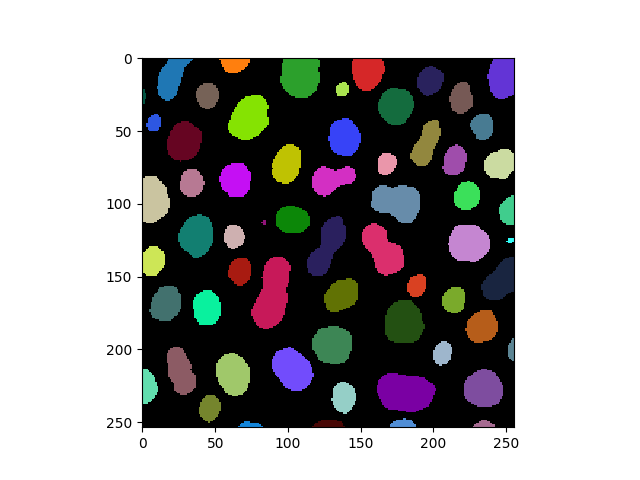

In [6]:
labeled = cle.connected_components_labeling_box(binary)
labeled

In [7]:
# The maximium intensity in a label image corresponds to the number of objects
num_labels = cle.maximum_of_all_pixels(labeled)
print("Number of objects in the image: " + str(num_labels))

Number of objects in the image: 62.0


In case the size of the objects is relevant, one should exclude the object which were not fully imaged and thus, touch the image border.

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32, mtype=buffer)
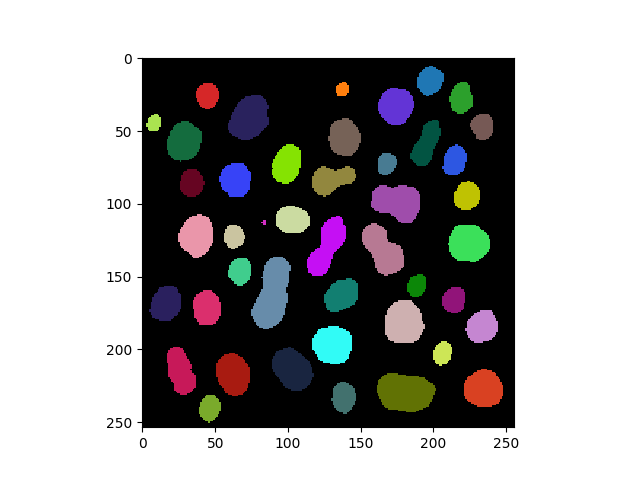

In [8]:
# Exclude Labels On Edges
labels_excl_edges = cle.exclude_labels_on_edges(labeled)
labels_excl_edges